In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert dates to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

In [2]:
# Basic information about datasets
print("Customers Dataset Info:")
print(customers_df.info())


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None


In [3]:
print("\nProducts Dataset Info:")
print(products_df.info())



Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None


In [4]:
print("\nTransactions Dataset Info:")
print(transactions_df.info())


Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None


In [5]:
# Checking for missing values
print("\nMissing Values in Customers Dataset:")
print(customers_df.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())



Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:

# Summary statistics
print("\nCustomers Region Distribution:")
print(customers_df['Region'].value_counts())

print("\nProduct Price Summary:")
print(products_df['Price'].describe())

print("\nTransaction Summary:")
print(transactions_df[['Quantity', 'TotalValue']].describe())



Customers Region Distribution:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64

Product Price Summary:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

Transaction Summary:
          Quantity   TotalValue
count  1000.000000  1000.000000
mean      2.537000   689.995560
std       1.117981   493.144478
min       1.000000    16.080000
25%       2.000000   295.295000
50%       3.000000   588.880000
75%       4.000000  1011.660000
max       4.000000  1991.040000


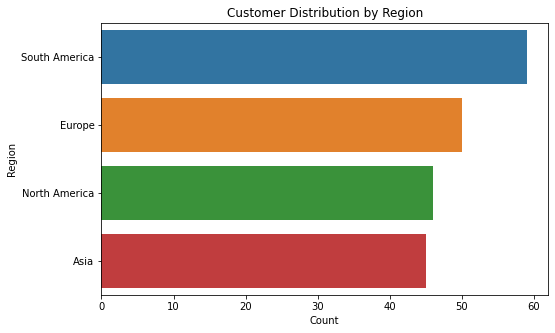

In [7]:

# Visualizations
# 1. Distribution of customers by region
plt.figure(figsize=(8, 5))
sns.countplot(y='Region', data=customers_df, order=customers_df['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


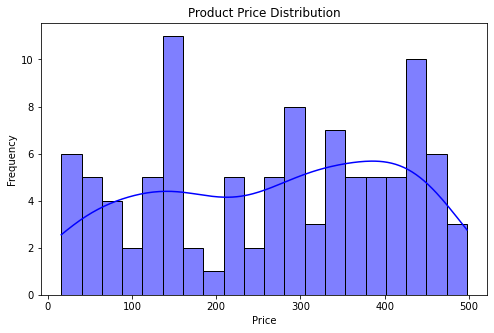

In [8]:

# 2. Product price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products_df['Price'], bins=20, kde=True, color='blue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



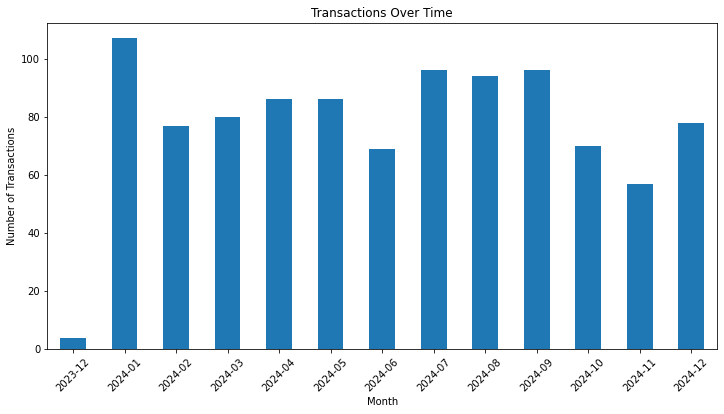

In [9]:
# 3. Transactions over time
plt.figure(figsize=(12, 6))
transactions_df['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


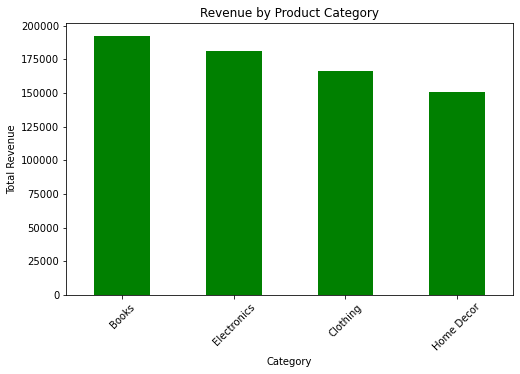

In [10]:

# 4. Revenue by category
category_revenue = transactions_df.merge(products_df, on="ProductID").groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='green')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


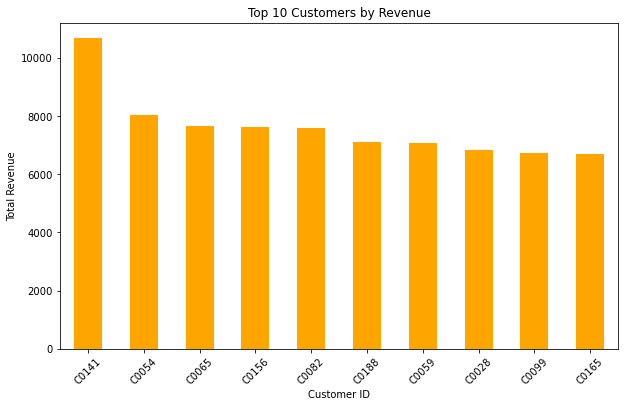

In [11]:

# 5. Top customers by revenue
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()
